In [1]:
from pymoo.core.parameters import get_params
from sklearn.ensemble import RandomForestClassifier

In [2]:
import copy
import pytest
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fomo.estimator import FomoClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score
from pmlb import pmlb
import fomo.metrics as metrics
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
dataset = pmlb.fetch_data('adult')
# dataset = dataset.sample(n=2000)
X = dataset.drop('target',axis=1)
y = dataset['target']
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,
                                            stratify=y,
                                            random_state=40,
                                            test_size=0.3
                                           )
ss = StandardScaler()
Xtrain = pd.DataFrame(ss.fit_transform(Xtrain), columns=Xtrain.columns, index=ytrain.index)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=Xtest.columns, index=ytest.index)
groups = ['race','sex']

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
from fomo.problem import MLPProblem
# if estimator using LogisticRegression, the best accuracy model =81.8%
# to improve model accuracy, consider to use RandomForest model
# time to train at leat increate 5000%
est = FomoClassifier(
    estimator= RandomForestClassifier(n_estimators=100, max_depth=3, random_state=20, n_jobs=1),
    fairness_metrics=[metrics.subgroup_FNR_scorer],
    accuracy_metrics=[make_scorer(accuracy_score, greater_is_better=True), make_scorer(metrics.FPR)],
    algorithm=NSGA2(),
    random_state=20,
    verbose=True,
    n_jobs=-1,
    store_final_models=True,
    problem_type=MLPProblem,
    checkpoint=False,
    picking_strategy='PseudoWeights'
)
est.fit(Xtrain,ytrain,protected_features=groups, termination=('n_gen',100))

running 8 processes
groups ['race', 'sex']
number of variables: 91
number of objectives: 3
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |     60 |             - |             -
     2 |      200 |     88 |  0.3406708595 |         ideal
     3 |      300 |    100 |  0.6281091998 |         ideal
     4 |      400 |    100 |  0.1520662190 |         nadir
     5 |      500 |    100 |  0.0072859745 |         ideal


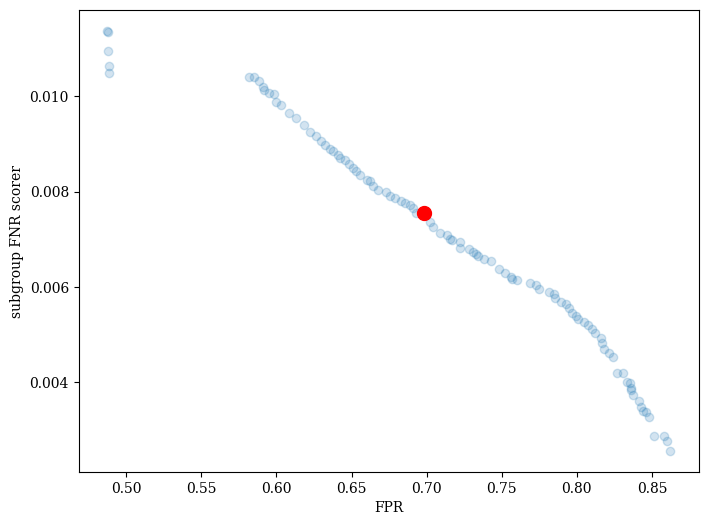

In [13]:
est.plot().show()

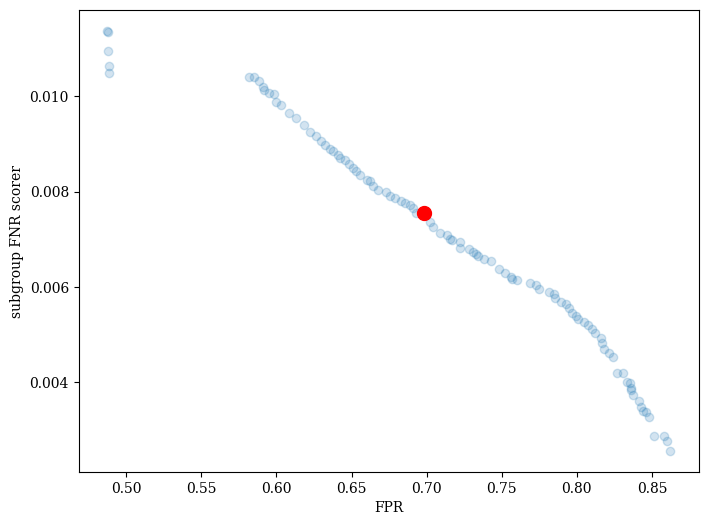

In [14]:
est.plot().show()

Text(0.5, 1.0, 'Picking with PseudoWeights')

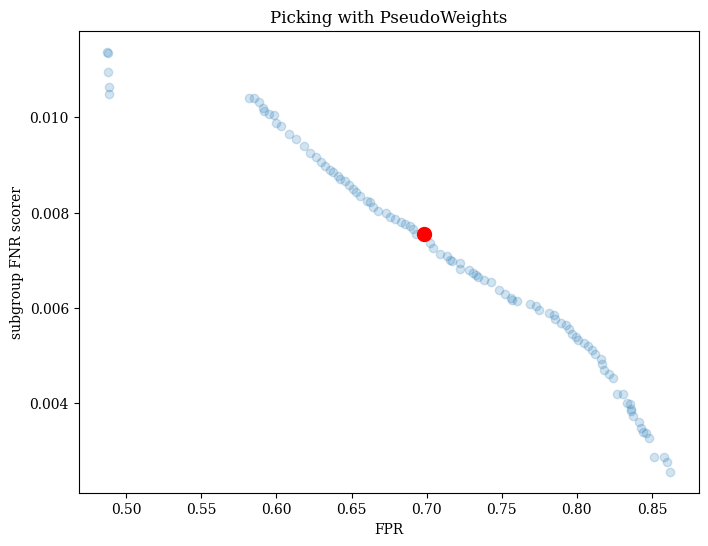

In [15]:
est.best_estimator_ = est.pick_best('PseudoWeights')
plot = est.plot()
plot.show()
plt.title('Picking with PseudoWeights')
#relagulazation PseudoWeight = np.arr[0.7, 0.3]


Text(0.5, 1.0, 'Picking with Compromise')

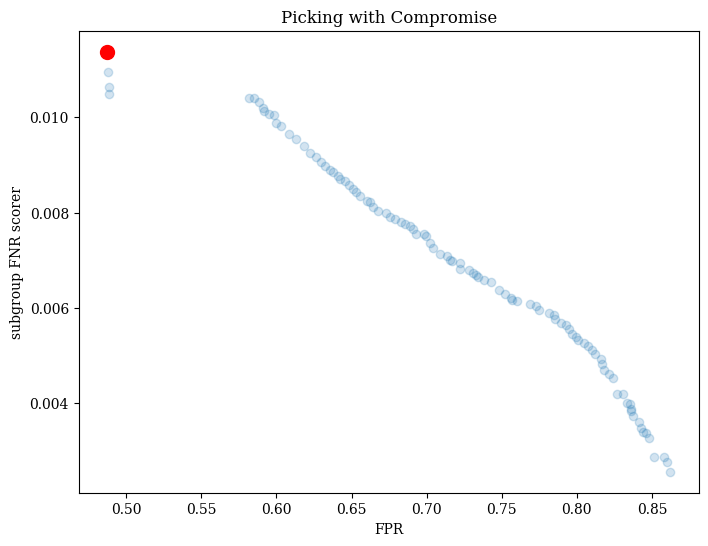

In [16]:
est.best_estimator_ = est.pick_best('Compromise')
plot2 = est.plot()
plot2.show()
plt.title('Picking with Compromise')


Here's an example of picking with the HighTradeoffPoints strategy.

In [ ]:
est.best_estimator_ = est.pick_best('HighTradeoffPoints')
plot3 = est.plot()
plot3.show()
plt.title('Picking with HighTradeoffPoints')
# the trend of chart looklike overfitting model, need to adjust more

NameError: name 'est' is not defined

In [1]:
y_pred = est.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f" Final Model Accuracy: {accuracy:.3f}")
print(f" Pareto Front Points: {len(est.res_.X)} solutions")

NameError: name 'est' is not defined